# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from citipy import citipy
import random
import time
import sys
# Import API key
sys.path.insert(1, '..')
from api_keys import g_key, weather_api_key

WMapurl = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url = f"{WMapurl}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [2]:
#Define Country, City Lists
CityNameList = []
CityCountryList = []

#Random 
def randLatNum():
    return random.randint(-900000, 900000)/10000
def randLongNum():
    return random.randint(-1800000, 1800000)/10000

while len(CityNameList) !=600:
        lat = randLatNum()
        long = randLongNum()
        city = citipy.nearest_city(lat, long)
        if city.city_name not in CityNameList:
            CityNameList.append(city.city_name)
            CityCountryList.append((city.country_code).upper())
CityNameList

['rikitea',
 'port lincoln',
 'ushuaia',
 'cape town',
 'barrow',
 'kortkeros',
 'kisangani',
 'mataura',
 'avarua',
 'ketchikan',
 'vila franca do campo',
 'kozhevnikovo',
 'ponta do sol',
 'krasnoturansk',
 'shchelyayur',
 'iqaluit',
 'hasaki',
 'saint-philippe',
 'castro',
 'berlevag',
 'pangnirtung',
 'albany',
 'constitucion',
 'illoqqortoormiut',
 'kapaa',
 'bandarbeyla',
 'amahai',
 'tigil',
 'busselton',
 'ilulissat',
 'taolanaro',
 'lithgow',
 'cururupu',
 'nizhneyansk',
 'zhezkazgan',
 'oktyabrsk',
 'tiksi',
 'barentsburg',
 'kununurra',
 'belushya guba',
 'goderich',
 'nouadhibou',
 'leh',
 'bluff',
 'praia',
 'arraial do cabo',
 'bredasdorp',
 'hilo',
 'lebu',
 'mount darwin',
 'punta arenas',
 'alappuzha',
 'jamestown',
 'makarov',
 'alofi',
 'chokurdakh',
 'mount gambier',
 'raudeberg',
 'severo-kurilsk',
 'tsihombe',
 'codrington',
 'te anau',
 'east london',
 'gejiu',
 'redcar',
 'burns lake',
 'nylstroom',
 'abu jubayhah',
 'kumluca',
 'atuona',
 'vila velha',
 'new no

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Define Info Grabbed Lists
CityNameInfoList = []
CityIDList = []
CityCountryInfoList = []
CityLatList = []
CityLongList = []
CityMaxTempList = []
CityHumidList = []
CityCloudyList = []
CityWindSpList = []
DateInfoObtained = []

#Defines reset Number for API
CountIterations = 0
CountFailures = 0

for city in CityNameList:
    try:
        CountIterations = CountIterations +1
        if (CountIterations % 59 == 0):
            time.sleep(61)
        Ccode = CityCountryList[CityNameList.index(city)]
        resp = requests.get(url + city+","+","+Ccode).json()
        CityLatList.append(resp['coord']['lat'])
        CityLongList.append(resp['coord']['lon'])
        CityHumidList.append(resp['main']['humidity'])
        CityCloudyList.append(resp['clouds']['all'])
        CityWindSpList.append(resp['wind']['speed'])
        DateInfoObtained.append(resp['dt'])
        CityMaxTempList.append(resp['main']['temp_max'])
        CityCountryInfoList.append(resp['sys']['country'])
        CityIDList.append(resp['id'])
        CityNameInfoList.append(city)
        IDGrabbed = resp['id']
        print(f'Information logged for {city}, {Ccode}; ID: {IDGrabbed}')
    except:
        CountFailures = CountFailures+1
        pass
print(f'Number of cities not found: {CountFailures}')

Information logged for rikitea, PF; ID: 4030556
Information logged for port lincoln, AU; ID: 2063036
Information logged for ushuaia, AR; ID: 3833367
Information logged for cape town, ZA; ID: 3369157
Information logged for barrow, US; ID: 5880054
Information logged for kortkeros, RU; ID: 544397
Information logged for kisangani, CD; ID: 212730
Information logged for mataura, PF; ID: 6201424
Information logged for avarua, CK; ID: 4035715
Information logged for ketchikan, US; ID: 5554428
Information logged for vila franca do campo, PT; ID: 3372472
Information logged for kozhevnikovo, RU; ID: 1502257
Information logged for ponta do sol, CV; ID: 3374346
Information logged for krasnoturansk, RU; ID: 1502063
Information logged for iqaluit, CA; ID: 5983720
Information logged for hasaki, JP; ID: 2112802
Information logged for saint-philippe, RE; ID: 935215
Information logged for castro, CL; ID: 3896218
Information logged for berlevag, NO; ID: 780687
Information logged for pangnirtung, CA; ID: 60

Information logged for ratnagiri, IN; ID: 1258338
Information logged for pathri, IN; ID: 1260120
Information logged for nanortalik, GL; ID: 3421765
Information logged for nikolskoye, RU; ID: 546105
Information logged for amurzet, RU; ID: 2027740
Information logged for turukhansk, RU; ID: 1488903
Information logged for dolores, AR; ID: 3435038
Information logged for jaciara, BR; ID: 3460355
Information logged for hamilton, BM; ID: 3573197
Information logged for meulaboh, ID; ID: 1214488
Information logged for odweyne, SO; ID: 53372
Information logged for luderitz, NA; ID: 3355672
Information logged for clyde river, CA; ID: 5924351
Information logged for puerto del rosario, ES; ID: 2512186
Information logged for chortkiv, UA; ID: 710400
Information logged for sinnar, SD; ID: 367644
Information logged for upernavik, GL; ID: 3418910
Information logged for butaritari, KI; ID: 2110227
Information logged for emerald, AU; ID: 2167426
Information logged for roald, NO; ID: 3141667
Information lo

Information logged for shatalovo, RU; ID: 495575
Information logged for norman wells, CA; ID: 6089245
Information logged for beidao, CN; ID: 1816751
Information logged for ghanzi, BW; ID: 933759
Information logged for batagay-alyta, RU; ID: 2027042
Information logged for maceio, BR; ID: 3395981
Information logged for porto novo, CV; ID: 3374336
Information logged for minab, IR; ID: 123941
Information logged for linda, RU; ID: 535183
Information logged for kaliganj, BD; ID: 1185199
Information logged for tuatapere, NZ; ID: 2180815
Information logged for silopi, TR; ID: 300797
Information logged for lichinga, MZ; ID: 1043893
Information logged for yorosso, ML; ID: 2448442
Information logged for moussoro, TD; ID: 2427336
Information logged for bonavista, CA; ID: 5905393
Information logged for akyab, MM; ID: 1295765
Information logged for pontes e lacerda, BR; ID: 3453060
Information logged for marsh harbour, BS; ID: 3571913
Information logged for paka, MY; ID: 1734313
Information logged f

Information logged for ternate, ID; ID: 1624041
Information logged for ngong, KE; ID: 183595
Information logged for camocim, BR; ID: 3403687
Information logged for banda aceh, ID; ID: 1215502
Information logged for shimanovsk, RU; ID: 2016701
Information logged for harbour breton, CA; ID: 5970478
Information logged for varlezi, RO; ID: 662759
Information logged for ballina, IE; ID: 2966778
Information logged for bilma, NE; ID: 2446796
Information logged for bacungan, PH; ID: 1729456
Information logged for pacific grove, US; ID: 5380437
Information logged for puerto varas, CL; ID: 3874930
Information logged for teguldet, RU; ID: 1489822
Information logged for matagami, CA; ID: 6067747
Information logged for angoche, MZ; ID: 1052944
Information logged for sinazongwe, ZM; ID: 897456
Information logged for hami, CN; ID: 1529484
Information logged for saint-jean-port-joli, CA; ID: 6620467
Information logged for san andres, CO; ID: 3670218
Information logged for bathsheba, BB; ID: 3374083
In

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
CityDataDF = pd.DataFrame({'City_ID': CityIDList, 'City': CityNameInfoList, 'Cloudiness': CityCloudyList, 'Country': CityCountryInfoList, 'Date': DateInfoObtained, 'Humidity':CityHumidList, 'Lat': CityLatList, 'Lng':CityLongList, 'Max Temp': CityMaxTempList, 'Wind Speed':CityWindSpList})
CityDataDF.to_csv('output.csv', index=False)
CityDataDF

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,4030556,rikitea,0,PF,1603139767,78,-23.12,-134.97,74.14,12.82
1,2063036,port lincoln,100,AU,1603139878,86,-34.73,135.87,55.89,12.62
2,3833367,ushuaia,90,AR,1603139753,80,-54.80,-68.30,39.20,38.03
3,3369157,cape town,40,ZA,1603139878,67,-33.93,18.42,61.00,10.29
4,5880054,barrow,90,US,1603139362,85,71.29,-156.79,21.20,10.29
...,...,...,...,...,...,...,...,...,...,...
550,1524298,aksu,83,KZ,1603140561,74,52.03,76.92,28.40,8.95
551,119505,qazvin,0,IR,1603140561,29,36.28,50.00,51.80,4.70
552,1513957,hazorasp,0,UZ,1603140561,37,41.32,61.07,50.00,2.24
553,2026861,berdigestyakh,100,RU,1603140561,95,62.10,126.70,14.88,5.57


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
CityDataDFTooHumid = CityDataDF.loc[CityDataDF.Humidity > 100]
CityDataDFTooHumid

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [6]:
CityDataCleanedDF = CityDataDF
consCheck = CityDataCleanedDF['Humidity'].isin(CityDataDFTooHumid['Humidity'])
CityDataCleanedDF.drop(CityDataCleanedDF[consCheck].index, inplace = True)
CityDataCleanedDF

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,4030556,rikitea,0,PF,1603139767,78,-23.12,-134.97,74.14,12.82
1,2063036,port lincoln,100,AU,1603139878,86,-34.73,135.87,55.89,12.62
2,3833367,ushuaia,90,AR,1603139753,80,-54.80,-68.30,39.20,38.03
3,3369157,cape town,40,ZA,1603139878,67,-33.93,18.42,61.00,10.29
4,5880054,barrow,90,US,1603139362,85,71.29,-156.79,21.20,10.29
...,...,...,...,...,...,...,...,...,...,...
550,1524298,aksu,83,KZ,1603140561,74,52.03,76.92,28.40,8.95
551,119505,qazvin,0,IR,1603140561,29,36.28,50.00,51.80,4.70
552,1513957,hazorasp,0,UZ,1603140561,37,41.32,61.07,50.00,2.24
553,2026861,berdigestyakh,100,RU,1603140561,95,62.10,126.70,14.88,5.57


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

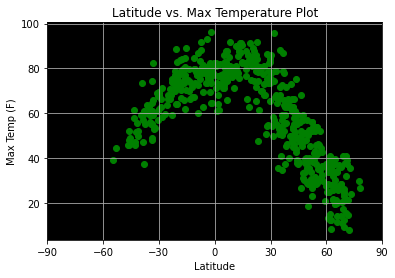

In [7]:
xticks = [-90, -60, -30, 0, 30, 60, 90]
xVals = CityDataCleanedDF['Lat']
yVals = CityDataCleanedDF['Max Temp']
plt.scatter(xVals,yVals, color='green')
plt.title('Latitude vs. Max Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.set_xticks(xticks)
ax.set_xlim(-90, 90)
ax.grid(axis='y')
ax.grid(axis='x')
plt.show()
ax.figure.savefig('Images/LatVsTemp.png')

#Analysis: The code analizes the maximum tempature for the day the API was ran against were that tempature was recorded, by how far it was away from the equator, in terms of latitude.

## Latitude vs. Humidity Plot

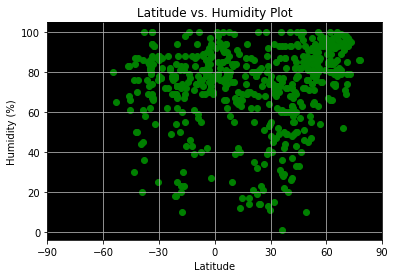

In [8]:
xVals = CityDataCleanedDF['Lat']
yVals = CityDataCleanedDF['Humidity']
plt.scatter(xVals,yVals, color='green')
plt.title('Latitude vs. Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.set_xticks(xticks)
ax.set_xlim(-90, 90)
ax.grid(axis='y')
ax.grid(axis='x')
plt.show()
ax.figure.savefig('Images/LatVsHum.png')
#Analysis: The code analizes the humidity for the day the API was ran against were that humidity was recorded, by how far it was away from the equator, in terms of Latitude.

## Latitude vs. Cloudiness Plot

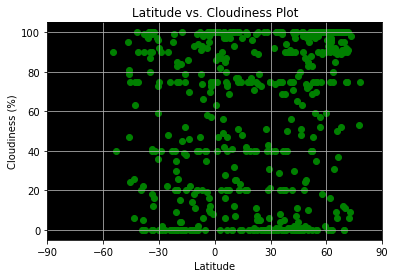

In [9]:
xVals = CityDataCleanedDF['Lat']
yVals = CityDataCleanedDF['Cloudiness']
plt.scatter(xVals,yVals, color='green')
plt.title('Latitude vs. Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.set_xticks(xticks)
ax.set_xlim(-90, 90)
ax.grid(axis='y')
ax.grid(axis='x')
plt.show()
ax.figure.savefig('Images/LatVsCloud.png')

#Analysis: The code analizes the cloudiness for the day the API was ran against were that cloudiness percent was recorded, by how far it was away from the equator, in terms of Latitude.

## Latitude vs. Wind Speed Plot

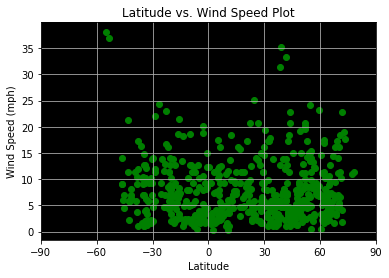

In [10]:
xVals = CityDataCleanedDF['Lat']
yVals = CityDataCleanedDF['Wind Speed']
plt.scatter(xVals,yVals, color='green')
plt.title('Latitude vs. Wind Speed Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.grid(axis='y')
ax.grid(axis='x')
ax.set_xticks(xticks)
ax.set_xlim(-90, 90)
plt.show()
ax.figure.savefig('Images/LatVsWindSp.png')
#Analysis: The code analizes the wind speed in mph, for the day the API was ran against were that cloudiness percent was recorded, by how far it was away from the equator, in terms of Latitude.

## Linear Regression

In [11]:
#Exclude cities on 0 on purpose.
NorthernCityDataDF = CityDataCleanedDF.loc[CityDataCleanedDF.Lat > 0]
SouthernCityDataDF = CityDataCleanedDF.loc[CityDataCleanedDF.Lat < 0]
SouthernCityDataDF

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,4030556,rikitea,0,PF,1603139767,78,-23.12,-134.97,74.14,12.82
1,2063036,port lincoln,100,AU,1603139878,86,-34.73,135.87,55.89,12.62
2,3833367,ushuaia,90,AR,1603139753,80,-54.80,-68.30,39.20,38.03
3,3369157,cape town,40,ZA,1603139878,67,-33.93,18.42,61.00,10.29
7,6201424,mataura,81,NZ,1603139755,83,-46.19,168.86,46.00,8.99
...,...,...,...,...,...,...,...,...,...,...
521,897456,sinazongwe,0,ZM,1603140496,30,-17.26,27.46,79.93,4.38
545,6690295,saint-denis,20,RE,1603140560,69,-20.87,55.47,73.40,12.75
546,2193968,amberley,26,NZ,1603140561,76,-43.17,172.73,57.99,11.41
547,2400547,gamba,100,GA,1603140561,87,-2.65,10.00,77.23,7.96


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

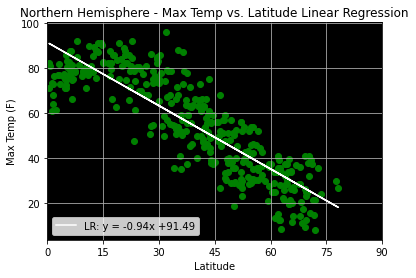

In [12]:
#Defining Ticks
NorthTicks = [0, 15, 30, 45, 60, 75, 90]
SouthTicks = [-x for x in NorthTicks]

xVals = NorthernCityDataDF['Lat']
yVals = NorthernCityDataDF['Max Temp']
plt.scatter(xVals,yVals, color='green')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.grid(axis='y')
ax.grid(axis='x')

              
(s, yint, rval, pval, stderr) = stats.linregress(xVals, yVals)
regvals = xVals * s + yint
linRegL = "y = " + str(round(s,2)) + "x +" + str(round(yint,2))
line1, = plt.plot(xVals,regvals,"white", label=f'LR: {linRegL}')
ax.set_xticks(NorthTicks)
ax.set_xlim(0, 90)
plt.legend(handles=[line1], loc="lower left")

plt.show()
ax.figure.savefig('Images/NorthernLatVsTemp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

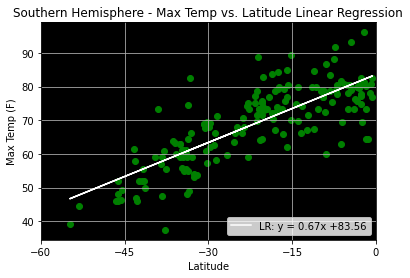

In [13]:
xVals = SouthernCityDataDF['Lat']
yVals = SouthernCityDataDF['Max Temp']
plt.scatter(xVals,yVals, color='green')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.grid(axis='y')
ax.grid(axis='x')

              
(s, yint, rval, pval, stderr) = stats.linregress(xVals, yVals)
regvals = xVals * s + yint
linRegL = "y = " + str(round(s,2)) + "x +" + str(round(yint,2))
line1, = plt.plot(xVals,regvals,"white", label=f'LR: {linRegL}')
ax.set_xticks(SouthTicks)
ax.set_xlim(-60, 0)
plt.legend(handles=[line1], loc="lower right")
plt.show()
ax.figure.savefig('Images/SouthernLatVsTemp.png', dpi=100)

#Analysis: Both graphs have a strong  positive correlation between the closer a location is to the equator, the higher the maximum tempature is likely to be for a given day.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

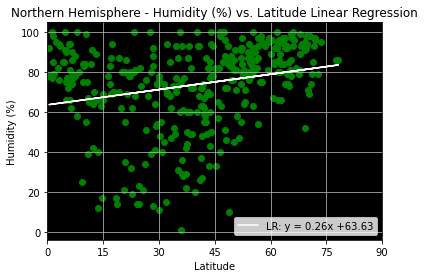

In [14]:
xVals = NorthernCityDataDF['Lat']
yVals = NorthernCityDataDF['Humidity']
plt.scatter(xVals,yVals, color='green')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.grid(axis='y')
ax.grid(axis='x')

              
(s, yint, rval, pval, stderr) = stats.linregress(xVals, yVals)
regvals = xVals * s + yint
linRegL = "y = " + str(round(s,2)) + "x +" + str(round(yint,2))
line1, = plt.plot(xVals,regvals,"white", label=f'LR: {linRegL}')
ax.set_xticks(NorthTicks)
ax.set_xlim(0, 90)
plt.legend(handles=[line1], loc="lower right")

plt.show()
ax.figure.savefig('Images/NorthernLatVsHum.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

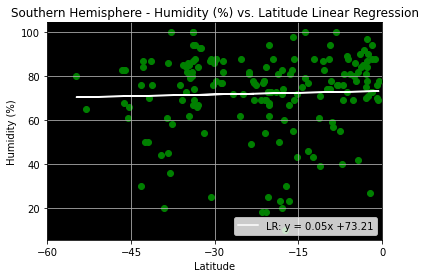

In [15]:
xVals = SouthernCityDataDF['Lat']
yVals = SouthernCityDataDF['Humidity']
plt.scatter(xVals,yVals, color='green')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.grid(axis='y')
ax.grid(axis='x')

(s, yint, rval, pval, stderr) = stats.linregress(xVals, yVals)
regvals = xVals * s + yint
linRegL = "y = " + str(round(s,2)) + "x +" + str(round(yint,2))
line1, = plt.plot(xVals,regvals,"white", label=f'LR: {linRegL}')
ax.set_xticks(SouthTicks)
ax.set_xlim(-60, 0)
plt.legend(handles=[line1], loc="lower right")

plt.show()
ax.figure.savefig('Images/SouthernLatVsHum.png')

#Analysis: Both gaphs appear to indicate no correllation correlation, or a very week, slight correlation between the humidity percentage and the further north you go. This may have something to do with the tilt of the axis.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

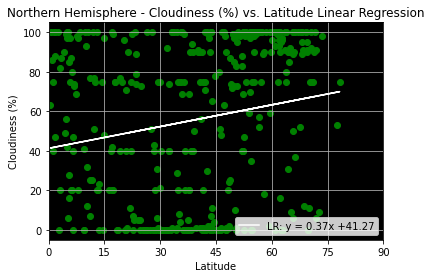

In [16]:
xVals = NorthernCityDataDF['Lat']
yVals = NorthernCityDataDF['Cloudiness']
plt.scatter(xVals,yVals, color='green')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.grid(axis='y')
ax.grid(axis='x')

(s, yint, rval, pval, stderr) = stats.linregress(xVals, yVals)
regvals = xVals * s + yint
linRegL = "y = " + str(round(s,2)) + "x +" + str(round(yint,2))
line1, = plt.plot(xVals,regvals,"white", label=f'LR: {linRegL}')
ax.set_xticks(NorthTicks)
ax.set_xlim(0, 90)
plt.legend(handles=[line1], loc="lower right")

plt.show()
ax.figure.savefig('Images/NorthernLatVsCloud.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

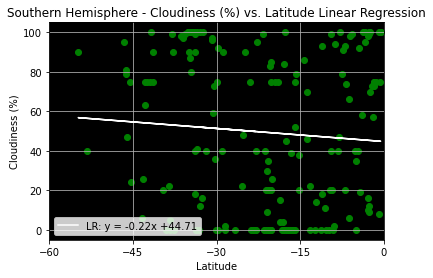

In [17]:
xVals = SouthernCityDataDF['Lat']
yVals = SouthernCityDataDF['Cloudiness']
plt.scatter(xVals,yVals, color='green')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.grid(axis='y')
ax.grid(axis='x')

(s, yint, rval, pval, stderr) = stats.linregress(xVals, yVals)
regvals = xVals * s + yint
linRegL = "y = " + str(round(s,2)) + "x +" + str(round(yint,2))
line1, = plt.plot(xVals,regvals,"white", label=f'LR: {linRegL}')
ax.set_xticks(SouthTicks)
ax.set_xlim(-60, 0)
plt.legend(handles=[line1], loc="lower left")

plt.show()
ax.figure.savefig('Images/SouthernLatVsCloud.png')

# Analysis: Both Graphs indicate no correlation between cloudiness and the position in terms of latitude a location is on the earth.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

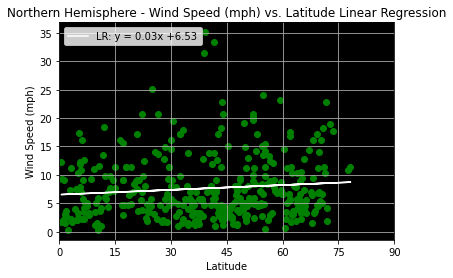

In [18]:
xVals = NorthernCityDataDF['Lat']
yVals = NorthernCityDataDF['Wind Speed']
plt.scatter(xVals,yVals, color='green')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.grid(axis='y')
ax.grid(axis='x')

(s, yint, rval, pval, stderr) = stats.linregress(xVals, yVals)
regvals = xVals * s + yint
linRegL = "y = " + str(round(s,2)) + "x +" + str(round(yint,2))
line1, = plt.plot(xVals,regvals,"white", label=f'LR: {linRegL}')
ax.set_xticks(NorthTicks)
ax.set_xlim(0, 90)
plt.legend(handles=[line1], loc="upper left")

plt.show()
ax.figure.savefig('Images/NorthernLatVsWindSp.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

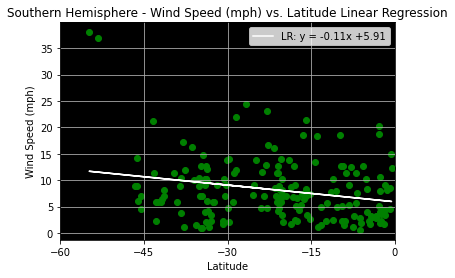

In [19]:
xVals = SouthernCityDataDF['Lat']
yVals = SouthernCityDataDF['Wind Speed']
plt.scatter(xVals,yVals, color='green')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.grid(axis='y')
ax.grid(axis='x')

(s, yint, rval, pval, stderr) = stats.linregress(xVals, yVals)
regvals = xVals * s + yint
linRegL = "y = " + str(round(s,2)) + "x +" + str(round(yint,2))
line1, = plt.plot(xVals,regvals,"white", label=f'LR: {linRegL}')
ax.set_xticks(SouthTicks)
ax.set_xlim(-60, 0)
plt.legend(handles=[line1], loc="upper right")

plt.show()
ax.figure.savefig('Images/SouthernLatVsWindSp.png')

In [ ]:
#Analysis: Both graphs appear to indicate either no correlation or a very slight and  week correlation between the wind speed and the latitude a location is on the earth. It appears to minorly increase in speed the closer to the poles a location is.